# Gradient descent on an advertising dataset
For this implementation, we are going to use the advertising dataset. This is a dataset that gives us the total sales for different products, after marketing them on Television, Radio and Newspaper. Using our algorithm, we can find out which medium performs the best for our sales and assign weights to all the mediums accordingly. This dataset can be downloaded from the link given below:

https://www.kaggle.com/sazid28/advertising.csv

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [80]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


X would represent TV, Radio and Newspaper while Y would represent our sales. As all these sales might be on different scales, we then normalise our X & Y variables.

In [81]:
X =  df[['TV', 'radio', 'newspaper']]
Y = df['sales']
X = X.apply(lambda rec: (rec-rec.mean())/rec.std(), axis=0)
Y = np.array((Y-Y.mean()/Y.std()))

Once we have a normalised dataset, we can start defining our algorithm. To implement a gradient descent algorithm we need to follow 4 steps:

- Randomly initialize the bias and the weight theta
- Calculate predicted value of y that is Y given the bias and the weight
- Calculate the cost function from predicted and actual values of Y
- Calculate gradient and the weights


To start, we will take a random value for bias and weights, which might be actually close to the optimal bias and weights or can be far off.

In [82]:
import random

def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b, theta 

b, theta = initialize(3)
print(f"Bias: {b}, Weights: {theta}.")

Bias: 0.6331956556177939, Weights: [0.30935412 0.08048335 0.66905751].


The next step is to calculate the output (Y) using these weights and bias.

In [83]:
def prediction_Y(b, theta, X):
    return b + np.dot(X, theta)

Y_hat = prediction_Y(b, theta, X)
Y_hat[0:10]

array([ 2.19850848,  0.79750476,  1.47835846,  1.6055534 ,  1.54271846,
        1.63910239,  0.14554089, -0.06566957, -0.88829905,  0.42391342])

Y_hat is the predicted output value whereas Y will be the actual value. The difference between these will give us our cost function. Which will be calculate in our next function.

In [84]:
def get_cost(Y, Y_hat):
    Y_resd = Y - Y_hat 
    return np.sum(np.dot(Y_resd.T, Y_resd))/len(Y-Y_resd)

Y_hat = prediction_Y(b, theta, X)
get_cost(Y, Y_hat)

137.64313051550525

This is our cost function, and our aim is to reduce this as much as possible to get the most accurate predictions. To get the updated bias and weights we use the gradient descent formula
The parameters passed to the function are

- x,y : the input and output variable
- y_hat: predicted value with current bias and weights
- b_0,theta_0: current bias and weights
- Learning rate: learning rate to adjust the update step

In [85]:
def update_theta(x,y,y_hat,b_0, theta_0, learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_0-learning_rate*dw
    return b_1,theta_1
print(f"After initialization-  Bias: {b}, theta {theta}")
y_hat = prediction_Y(b, theta, X)
b, theta = update_theta(X,Y,Y_hat,b,theta,0.001)
print(f"After first update-  Bias: {b}, Theta: {theta}")
get_cost(Y, Y_hat)

After initialization-  Bias: 0.6331956556177939, theta [0.30935412 0.08048335 0.66905751]
After first update-  Bias: 0.6545990398754986, Theta: [0.31677594 0.08580076 0.67000487]


137.64313051550525

we can create a main gradient descent function, which runs them for a particular number of iteration and finds us optimal bias and weights. For this implementation, we are running the function for 200 iterations.

In [89]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Y_hat = prediction_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X,Y,Y_hat, prev_b, prev_theta, alpha)
        if (iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1
        iter_num += 1
    print(f"Final estimate of b and theta: {b}, {theta}")
    return gd_iterations_df, b, theta
gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha=0.001, num_iterations=4000)
            

Final estimate of b and theta: 11.33140335454088, [ 3.92793733  2.78925997 -0.01250377]


In [90]:
gd_iterations_df.tail(10)

,iteration,cost
390,3900.0,2.784311
391,3910.0,2.784306
392,3920.0,2.784301
393,3930.0,2.784296
394,3940.0,2.784292
395,3950.0,2.784287
396,3960.0,2.784283
397,3970.0,2.784279
398,3980.0,2.784275
399,3990.0,2.784271


We can also plot the cost function to iterations to see the result.

Text(0, 0.5, 'Cost or MSE')

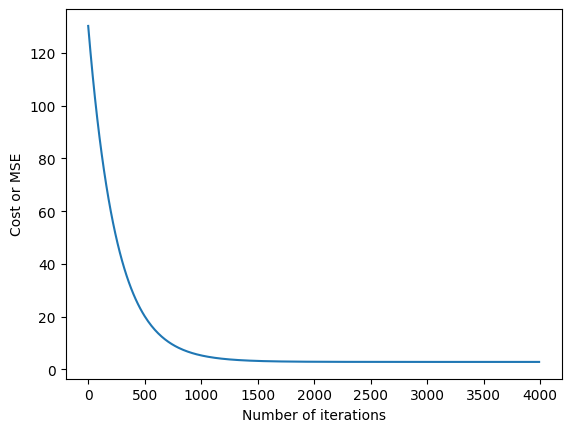

In [91]:
# % matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

let’s try with α=0.01 for 2000 iterations and compare it with α=0.001 and find which learning rate is better for this dataset.

Final estimate of b and theta: 11.334887784470087, [ 3.92908869  2.79906919 -0.02259517]
Final estimate of b and theta: 11.14476729844773, [3.86433745 2.71152513 0.07122818]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

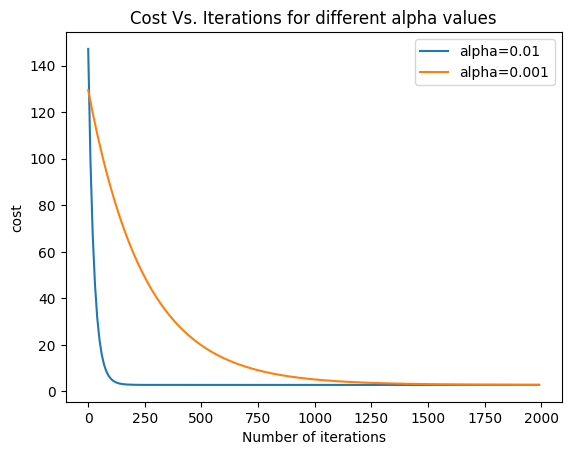

In [92]:
alpha_df_1, b, theta = run_gradient_descent(X,Y,alpha=0.01, num_iterations=2000)
alpha_df_2, b, theta = run_gradient_descent(X,Y,alpha=0.001, num_iterations=2000)

plt.plot(alpha_df_1['iteration'], alpha_df_1['cost'], label="alpha=0.01")
plt.plot(alpha_df_2['iteration'], alpha_df_2['cost'], label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')